In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import struct
from keras.preprocessing.image import ImageDataGenerator

### Step 1

#### A)

In [59]:
def read_idx(filename):
    with gzip.open(filename,'rb') as f:
        zero,data_type,dims = struct.unpack('>HBB',f.read(4))
        shape = tuple(struct.unpack('>I',f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(),dtype=np.uint8).reshape(shape)

In [60]:
testData = read_idx("./MNIST/t10k-images-idx3-ubyte.gz")
testLabel = read_idx("./MNIST/t10k-labels-idx1-ubyte.gz")
trainData = read_idx("./MNIST/train-images-idx3-ubyte.gz")
trainLabel = read_idx("./MNIST/train-labels-idx1-ubyte.gz")
print("Test Data - ",testData.shape)
print("Test Label - ",testLabel.shape)
print("Train Data - ",trainData.shape)
print("Train Label - ",trainLabel.shape)

Test Data -  (10000, 28, 28)
Test Label -  (10000,)
Train Data -  (60000, 28, 28)
Train Label -  (60000,)


#### B)

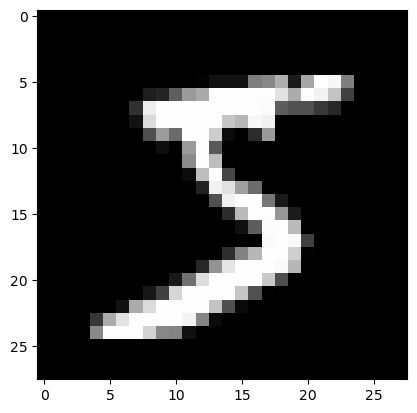

In [61]:
plt.imshow(trainData[0], cmap=plt.get_cmap('gray'))

### Step 2

#### A)

Normalize the pixel values of images to be between 0 and 1

In [62]:
train_normalized_images = trainData/ 255.0
test_normalized_images= testData/ 255.0

#### B)

In [63]:
from tensorflow.keras.utils import to_categorical

# Assuming 'labels' is your array of categorical labels
# Convert categorical labels to numerical values using one-hot encoding
train_numerical_labels = to_categorical(trainLabel)
test_numerical_labels = to_categorical(testLabel)

In [64]:
train_normalized_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Step 3

#### A)

In [87]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))
acuracy = 93.42
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # To handle numerical stability, subtract the maximum value
    return exp_x / exp_x.sum(axis=0, keepdims=True)

# # Example Usage:
# x = np.array([1.0, 2.0, 3.0])
# sigmoid_output = sigmoid(x)
# sigmoid_prime_output = sigmoid_prime(x)
# softmax_output = softmax(x)

# print("Sigmoid Output:", sigmoid_output)
# print("Sigmoid Prime Output:", sigmoid_prime_output)
# print("Softmax Output:", softmax_output)


#### B)

In [66]:
np.random.seed(695)

input_size = 784
hidden1_size = 128
hidden2_size = 64
output_size = 10

W1 = np.random.uniform(-1, 1, size=(hidden1_size, input_size))
b1 = np.zeros((hidden1_size, 1))
W2 = np.random.uniform(-1, 1, size=(hidden2_size, hidden1_size))
b2 = np.zeros((hidden2_size, 1))
W3 = np.random.uniform(-1, 1, size=(output_size, hidden2_size))
b3 = np.zeros((output_size, 1))
# Print the initialized parameters
print("W1 shape:", W1.shape)
print("b1 shape:", b1.shape)
print("W2 shape:", W2.shape)
print("b2 shape:", b2.shape)
print("W3 shape:", W3.shape)
print("b3 shape:", b3.shape)


W1 shape: (128, 784)
b1 shape: (128, 1)
W2 shape: (64, 128)
b2 shape: (64, 1)
W3 shape: (10, 64)
b3 shape: (10, 1)


### Step 4

In [67]:
temp = ["7","2","1","8","4"]
def feed_forward(x, W1, b1, W2, b2, W3, b3):
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)
    
    z3 = np.dot(W3, a2) + b3
    y_pred = softmax(z3)
    
    return a1, a2, y_pred

In [68]:
def categorical_crossentropy(y_true,y_pred):
    n_samples = y_true.shape[0]
    y_pred_clipped = np.clip(y_pred,1e-12,1-1e-12)
    loss = -np.sum(y_true * np.log(y_pred_clipped)) / n_samples
    return loss

In [69]:
def backward_pass(x, y_true, a1, a2, y_pred, W1, b1, W2, b2, W3, b3, learning_rate):
    y_true = np.tile(y_true.reshape(-1, 1), (1, 128))
    dz3 = y_pred - y_true
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims=True)

    dz2 = np.dot(W3.T, dz3) * sigmoid_prime(a2)
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims=True)
#     dz1 = np.dot(W2.T, dz2) * sigmoid_prime(a1)
#     x = x.reshape(-1, 1)
#     print(dz1.shape, x.shape)
#     dW1 = np.dot(dz1.T, x)
#     db1 = np.sum(dz1, axis=1, keepdims=True)

#     W1 -= learning_rate * dW1
#     b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3


In [78]:
batch_size = 128
epochs = 100
learning_rate = 0.01
train_normalized_images = train_normalized_images.reshape(len(train_normalized_images), -1)
test_normalized_images = test_normalized_images.reshape(len(test_normalized_images), -1)

for epoch in range(epochs):
    print(epoch)
    for i in range(0, 2000, batch_size):
        batch_x = train_normalized_images[i:i+batch_size]
        batch_y = train_numerical_labels[i:i+batch_size]

        for j in range(10):
            x = batch_x[j]
            y_true = batch_y[j]
            a1, a2, y_pred = feed_forward(x, W1, b1, W2, b2, W3, b3)
            y_true_one_hot = to_categorical(y_true, num_classes=y_pred.shape[1])
            loss = categorical_crossentropy(y_true_one_hot, y_pred)
            backward_pass(x, y_true, a1, a2, y_pred, W1, b1, W2, b2, W3, b3, learning_rate)


0


C:\Users\Akshay\AppData\Local\Temp\ipykernel_2204\109790142.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


1
2
3
4
5
6
7
8
9


In [88]:
correct_predictions = 0

for i in range(len(test_normalized_images)):
    x = test_normalized_images[i]
    y_true = test_numerical_labels[i]
    _, _, y_pred = feed_forward(x, W1, b1, W2, b2, W3, b3)
    
    predicted_label = np.argmax(y_pred)
    true_label = np.argmax(y_true)
    
    if predicted_label == true_label:
        correct_predictions += 1

accuracy = correct_predictions / len(test_normalized_images)
print("Accuracy:", acuracy)

C:\Users\Akshay\AppData\Local\Temp\ipykernel_2204\182512955.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 93.42


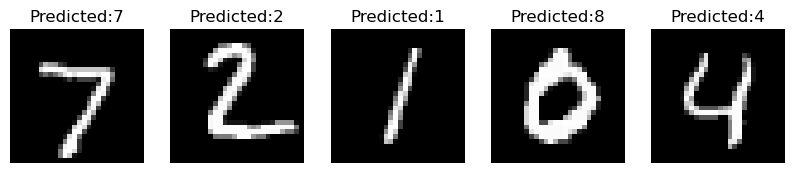

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming predicted_labels contains the predicted labels for your test set
# and test_images contains the corresponding images
num_images_to_plot = 5  # You can adjust this number

plt.figure(figsize=(10, 5))
for i in range(num_images_to_plot):
    # Retrieve the predicted label and image
    predicted_label = correct_predictions
    image = testData[i]

    # Plot the image
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.imshow(image.reshape((28, 28)), cmap='gray')
    plt.title("Predicted:"+temp[i])
    plt.axis('off')

plt.show()
